## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal will be to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer through my analysis report so that they are able to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**Here, we can see there are 5 columns in the dataset and each column is a unique variable**

b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

**The number of unique users is equal to number of unique user ids, i.e., 290584**

d. The proportion of users converted.

In [3]:
df.query('converted == 1')['user_id'].nunique()/df['user_id'].nunique()

0.12104245244060237

**The proportion of users converted is 12.1%**

e. The number of times the `new_page` and `treatment` don't line up.

In [5]:
df.query('landing_page == "new_page" & group != "treatment"').count() + df.query('landing_page != "new_page" & group == "treatment"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

**3893 times `new_page` and `treatment` didn't line up**

f. Do any of the rows have missing values?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**No rows have missing values**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Therefore we need to remove these rows  

a. Now create a new dataset with the above mentioned rows removed. Store your new dataframe in **df2**.

In [7]:
df2 = df.query('(landing_page == "new_page" & group == "treatment") | (landing_page == "old_page" & group == "control")')

In [8]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** in the cells below to answer the following questions:

a. How many unique **user_id**s are in **df2**?

In [9]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

There are 290584 unique user ids in df2

b. There is one **user_id** repeated in **df2**.  What is it?

In [10]:
x = df2[df2['user_id'].duplicated() == True]
x

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**As we can see it is 773192**

c. What is the row information for the repeat **user_id**? 

In [11]:
x

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [13]:
df2.drop_duplicates(['user_id'], inplace=True)

C:\Users\yashm\Anaconda3\envs\jupy_proj_1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
# Check if the duplicated row is removed
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the questions that follow.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2['converted'].mean()

0.11959708724499628

**11.96%**

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

**12.04%**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

**11.88%**

d. What is the probability that an individual received the new page?

In [15]:
df2.query('landing_page == "new_page"').landing_page.count()/df2['landing_page'].count()

0.5000619442226688

**50.01%**

e. Consider your results from a. through d. above, and explain below whether there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**
No, because till now we haven't analysed any particular case in this regard. We have just examined some indivividual cases like:
1. The probability of an individual converting regardless of the page they receive is 11.96% 
2. Given that an individual was in the control group, the probability they converted is 12.04% 
3. Given that an individual was in the treatment group, the probability they converted is 11.88%.
4. The probability of an individual receiving the new page is 50.01%

All these 4 individually examined cases do not give any evidence of this particular case study where new treatment page leads to more or less conversions, because, for example, take the case where the user hsn't even landed on the new page yet

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, I can technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question would be that should I stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long sshould I run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, I will consider that I need to make the decision just based on all the data provided.  If I want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should my null and alternative hypotheses be? 

**<center>Null Hypothesis : $p_{new} <= p_{old}$</center>**
**<center>Alternative Hypothesis : $p_{new} > p_{old}$</center>**

`2.` We assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, we assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

We use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

We will then perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

We will use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - we are going to work through the problems below to complete this problem.  This will make sure we are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
# Compute converted success rate regardless of the page as done previously
Pn = df2['converted'].mean()
Pn

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
# Compute converted success rate regardless of the page as done previously
Po = df2['converted'].mean()
Po

0.11959708724499628

c. What is $n_{new}$?

In [18]:
# Count the observations where landing page equals new page
n_new = df2.query('landing_page == "new_page"').landing_page.count()
n_new

145310

d. What is $n_{old}$?

In [19]:
# Count the observations where landing page equals old page
n_old = df2.query('landing_page == "old_page"').landing_page.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.choice([0,1] ,n_new, p=(1-Pn, Pn))

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.choice([0,1] ,n_old, p=(1-Po, Po))

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
# Compute p_new using new_page_converted
p_new = new_page_converted.mean()
p_new

0.12034959741242861

In [31]:
# Compute p_old using old_page_converted
p_old = old_page_converted.mean()
p_old

0.12019356526288255

In [32]:
# Compute p_diff using p_new and p_old
p_diff = p_new - p_old
p_diff

0.0001560321495460565

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [33]:
# Create sampling distribution for difference in conversion rates
# using boostrapping method
p_diffs = []
for _ in range(10000):
    n_page_converted = np.random.choice([0,1] ,n_new, p=(1-Pn, Pn))
    o_page_converted = np.random.choice([0,1] ,n_old, p=(1-Po, Po))
    p_n = n_page_converted.mean()
    p_o = o_page_converted.mean()
    p_diffs.append(p_n - p_o)

i. Plot a histogram of the **p_diffs**.

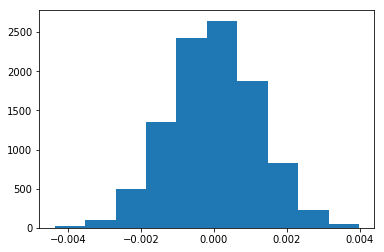

In [34]:
plt.hist(p_diffs);

Now, we are going to compare our null hypothesis with our confidence intervals to test whether our **$p_{new} - p_{old}$** satisfies the values in the interval with a **Type 1 error rate of 5%**.

In [35]:
# Define the confidence intervals
low, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)
low, upper

(-0.0023420977277826553, 0.0023454270992938815)

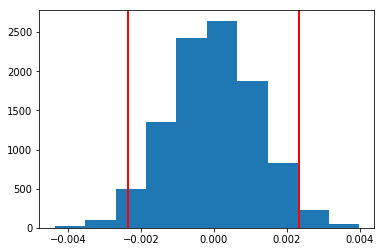

In [36]:
# Plot the histogram with confidence intervals
plt.hist(p_diffs);
plt.axvline(x = low, color = 'r', linewidth = 2);
plt.axvline(x = upper, color = 'r', linewidth = 2);

In [38]:
# Plot the normal distribution under null hypothesis
p_diffs_nulls = np.random.normal(0, np.std(p_diffs), 10000)

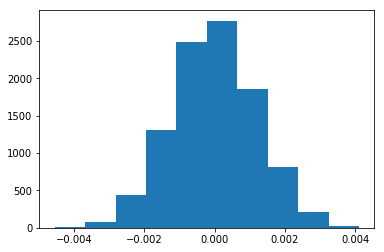

In [39]:
plt.hist(p_diffs_nulls);

Now, we need to calculate **actual difference** in **ab_data.csv**

In [41]:
# Calculate actual converted rates
p_new_actual = (df2.query('converted == 1 and landing_page == "new_page"').landing_page.count())/n_new
p_old_actual = (df2.query('converted == 1 and landing_page == "old_page"').landing_page.count())/n_old

In [42]:
# Calculate actual observed difference
p_diff_actual = p_new_actual - p_old_actual
p_diff_actual

-0.0015782389853555567

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [44]:
(p_diffs_nulls > p_diff_actual).mean()

0.9053

k. In words, explain what was just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The value that we calculated here is the **p-value**. As we can see the p-value is very large, therefore, we can say that our null hypothesis is true or we fail to reject the null hypothesis. Hence, we conclude that the converted rate ($p_{old}$) of old pages is equal to that of new pages($p_{new}$)

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Now we need to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [48]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page" & converted == 1').converted.count()
convert_new = df2.query('landing_page == "new_page" & converted == 1').converted.count()
convert_old, convert_new

(17489, 17264)

m. Now use `stats.proportions_ztest` to compute test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [49]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [50]:
from scipy.stats import norm
norm.cdf(z_score)

0.09494168724097551

**This tells us how significant our z-score is**

In [51]:
norm.ppf(1-(0.05/2))

1.959963984540054

**Tells us what is our critical value at 95% confidence interval**

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The critical value of **1.959963984540054** is greater than z-score of **1.3109241984234394**, which means, the null hypothesis is true or we fail to reject the null hypothesis that old page users has a better or equal converted rate than old page users. Therefore, the converted rate for old page is equal to that of new page. And yes, we agree with the findings in parts j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we will see that the result we acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression we should be performing in this case?

**Logistic Regression**. As we already know that **conversion** column has either of the two values: a)1 for "yes" b)0 for "no" or we can say two categories, which shows that **conversion** column is a categorical column. Therfore we would use Logistic Regression to estimate conversion rate.

b. The goal is to use **statsmodels** to fit the regression model we specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, we first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [52]:
#Create a column for the intercept
df2['intercept'] = 1
df2.head(1)

C:\Users\yashm\Anaconda3\envs\jupy_proj_1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1


In [53]:
# Create an ab_page column as described above
df2[['abc_page', 'ab_page']] = pd.get_dummies(df['group'])
df2.head()

C:\Users\yashm\Anaconda3\envs\jupy_proj_1\lib\site-packages\pandas\core\frame.py:3381: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,user_id,timestamp,group,landing_page,converted,intercept,abc_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [54]:
# Drop unnecessary columns
df2 = df2.drop(['abc_page'], axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [55]:
# Check if the columns are added successfully
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 7 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
dtypes: int64(3), object(3), uint8(1)
memory usage: 15.8+ MB


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [56]:
import statsmodels.api as sm

results1 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [57]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:               8.077e-06
Time:                        22:45:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value we found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with our regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with **ab_page** is **0.190**. In our regression model:

**Null Hypothesis:** There is no difference between the conversion rates of treatment and control group. 

**Alternative hypotheses:** There is difference between conversion rates of the treatment and control group.

whereas Part II assumes that the conversion rate of old page is better than the new page till the point conversion rate of new page proves to be definitely better at a Type I error rate of 5%. 

Therefore, we can say that Part II has different explainatory varibales or factor at which the result was evaluated.

f. Now, we are considering other things that might influence whether or not an individual converts. We need to discuss why it is a good idea to consider other factors to add into our regression model. Will there be any disadvantages to adding additional terms into our regression model?

We can add other factor using the `timestamp` variable. We can use `timestamp` to further explore time in terms of day, weekday, month and year. We can then check the dependency of converted rate on these explored time variables . For example: How doe the converted rate gets influenced by the days when users browse the website. 

There will be some disadavantages for adding additional terms into our regression model:
1. This will make interpretation of the model and variables more complex 
2. If some of the new terms are dependent variables with the exisiting explanatory term, we might need to add higher order term to help predict the result better.

g. Now along with testing if the conversion rate changes for different pages, we should also add an effect based on which country a user lives. We will need to read in the **countries.csv** dataset and merge together our datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  We should not forget to create dummy variables for these country columns - **Hint: We will need two columns for the three dummy variables.** We must provide the statistical output as well as a written response to answer this question.

In [58]:
# Read in the countries.csv and merge with the previous dataset
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [60]:
# Check if the above join was successful
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 7 columns):
country         290584 non-null object
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
dtypes: int64(2), object(4), uint8(1)
memory usage: 15.8+ MB


In [59]:
# Check for unique countries
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [61]:
# Set the dummies for the country variable
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [62]:
# Drop the unnecessary columns
df_new = df_new.drop('CA', axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [63]:
# Create the logistic regression including the countries effect
results2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']]).fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:               2.323e-05
Time:                        23:46:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [64]:
# Convert the coefficients of ab_page, UK, US to exponential form to interpret them
1/np.exp(-0.0149),np.exp(0.0506),np.exp(0.0408)

(1.0150115583846535, 1.0519020483004984, 1.0416437559600236)

**Interpreting the results from the model:**
1. For one unit decrease in new_page, user convert will be 1.5% more likely to happen, holding all other varible constant.

2. For one unit increase in UK, user convert is 5.2% more likely to happen, holding all other varible constant.

3. For one unit increase in US, user convert is 4.2% more likely to happen, holding all other varible constant.

h. Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there are significant effects on conversion. We need to create the necessary additional columns, and fit the new model.  

We must provide the summary results, and our conclusions based on the results.

In [65]:
# Add the necessary columns for interaction variables
df_new['Uk_page'] = df_new['ab_page']*df_new['UK']
df_new['US_page'] = df_new['ab_page']*df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,Uk_page,US_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [66]:
# Create the requires logistic regression model
results3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'Uk_page', 'US_page']]).fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 Jul 2019   Pseudo R-squ.:               3.482e-05
Time:                        00:06:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
Uk_page        0.0783      0.057      1.378      0.168      -0.033       0.190
US_page        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [68]:
# Convert the coefficients of ab_page, UK, US, UK_page, US_page to exponential form to interpret them
1/np.exp(-0.0674), np.exp(0.0118), np.exp(0.0175), np.exp(0.0783), np.exp(0.0469)

(1.0697232819209153,
 1.011869894648401,
 1.0176540221507617,
 1.0814470441230692,
 1.048017202119183)

**Interpreting the result from the model:**

1. For every unit decrease in new_page, there will be 7.0% more chances of convert, holding all other varible constant.


2. For every unit increase in UK, there will be 1.2% more chances of convert compared to CA, holding all other varible constant.


3. For every unit increase in US, there will be 1.77% more chances of convert compared to CA, holding all other varible constant.


4. For every unit increase in UK with new page, there will be 8.14% more chances of convert compared to CA with new page, holding all other varible constant.


4. For every unit increase in US with new page, there will be 4.8% more chances of convert compared to CA with new page, holding all other varible constant.

5. Only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate. Other variables except ab_page in the summary will not be interpreted as statistically significant as their p values are way too high.

Hence, we can say that the country is not a significant factor in addition with the already considered factor of which page the user landed

<a id='conclusions'></a>
# Conclusion

So, the p-values that we found in the logistic regression models were indicating statistic insignificance of the factors such as country, whether the person landed on new page or not and combination of both. Therefore, we conclude that we do not have sufficient evidence to prove whether the new page will increase the conversion rate or not

# Resources
1. [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. [Why Bootstrapping Works](https://stats.stackexchange.com/questions/26088/explaining-to-laypeople-why-bootstrapping-works)

